In [20]:
#IMPORT DATA

import pandas as pd
import numpy as np
from sklearn import datasets
import sklearn.preprocessing as preprocessing

DataLabels =["age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
               "occupation", "relationship", "race", "sex", "capital-gain",
               "capital-loss", "hours-per-week", "native-country", "class"]

dataset = ('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data')
data = pd.read_csv(dataset, header=None, names=DataLabels, sep=r'\s*,\s*', engine='python', na_values=["?"])
data.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [21]:
#INSTANCE, MISSING VALUE

print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))

print('Number of missing values:')
for col in data.columns:
    print('\t%s: %d' % (col,data[col].isnull().sum()))
data.describe()

Number of instances = 32561
Number of attributes = 15
Number of missing values:
	age: 0
	workclass: 1836
	fnlwgt: 0
	education: 0
	education-num: 0
	marital-status: 0
	occupation: 1843
	relationship: 0
	race: 0
	sex: 0
	capital-gain: 0
	capital-loss: 0
	hours-per-week: 0
	native-country: 583
	class: 0


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [22]:
#STATISTIC DATA

X_data = data.iloc[:, :-1].values
y_target = data.iloc[:, -1].values

print(X_data.shape)
print(y_target.shape)
print(data.dtypes)

print(data.head())
print(data.tail())
print(data.describe())
print(data.median())
print(data.mad())

(32561, 14)
(32561,)
age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
class             object
dtype: object
   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Mal

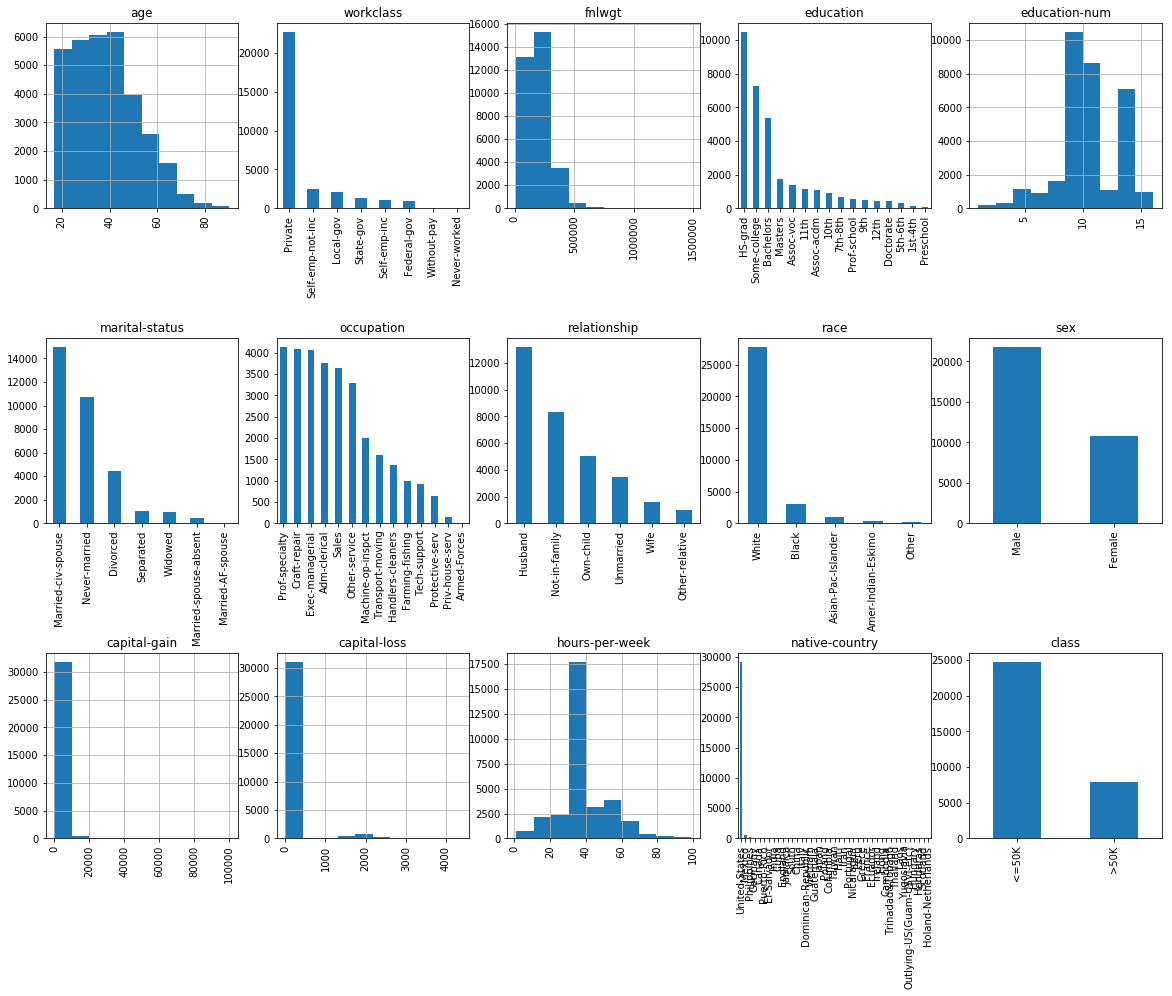

In [16]:
#HISTOGRAM

import math

fig = plt.figure(figsize=(20,15))
cols = 5
rows = math.ceil(float(data.shape[1]) / cols)
for i, column in enumerate(data.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if data.dtypes[column] == np.object:
        data[column].value_counts().plot(kind="bar", axes=ax)
    else:
        data[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

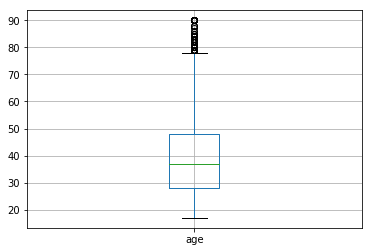

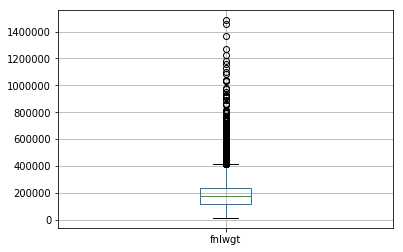

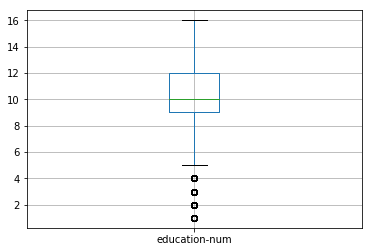

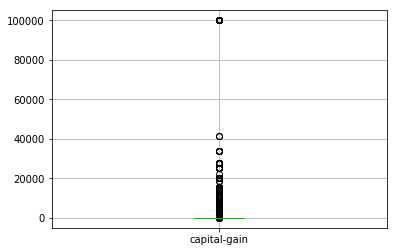

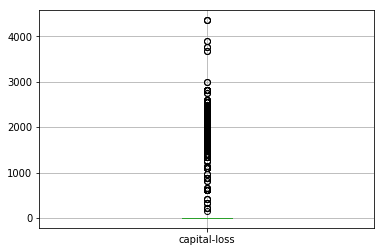

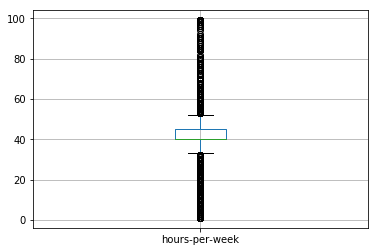

In [39]:
#BOXPLOT

for x in index :
    X_data = data.iloc[:,[x]].values
    df = pd.DataFrame(X_data, columns=[DataLabels[x]])
    df.boxplot()
    plt.show()

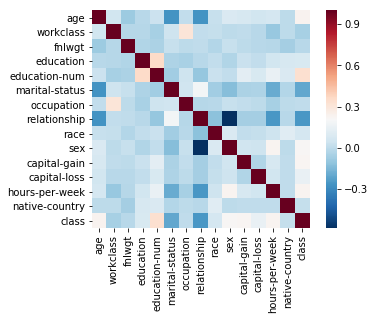

In [31]:
#CORRELATION
def number_encode_features(df):
    result = df.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column].astype(str))
    return result, encoders

# Calculate the correlation and plot it
data, _ = number_encode_features(data)
sns.heatmap(data.corr(), square=True, cmap = "RdBu_r")
plt.show()